# **project**

## *importing*

### libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

### data

In [ ]:
df=pd.read_csv('/content/Loan_Default.csv')

## *preproccing*

### check data

In [ ]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758.0,CIB,25-34,to_inst,98.728814,south,direct,1.0,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552.0,EXP,55-64,to_inst,NaN,North,direct,1.0,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834.0,CIB,35-44,to_inst,80.019685,south,direct,0.0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587.0,CIB,45-54,not_inst,69.376900,North,direct,0.0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602.0,EXP,25-34,not_inst,91.886544,North,direct,0.0,39.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98641 entries, 0 to 98640
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         98641 non-null  int64  
 1   year                       98641 non-null  int64  
 2   loan_limit                 96408 non-null  object 
 3   Gender                     98641 non-null  object 
 4   approv_in_adv              98033 non-null  object 
 5   loan_type                  98641 non-null  object 
 6   loan_purpose               98558 non-null  object 
 7   Credit_Worthiness          98641 non-null  object 
 8   open_credit                98641 non-null  object 
 9   business_or_commercial     98641 non-null  object 
 10  loan_amount                98641 non-null  int64  
 11  rate_of_interest           74556 non-null  float64
 12  Interest_rate_spread       74420 non-null  float64
 13  Upfront_charges            72429 non-null  flo

In [ ]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [ ]:
df.drop('ID',axis=1,inplace=True)

### null

In [ ]:
df.isnull().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [ ]:

df.dropna(subset=['age','submission_of_application'],inplace=True)


In [ ]:
df['dtir1'].value_counts()

,count
dtir1,
37.0,6848
36.0,6553
44.0,6500
49.0,6309
43.0,5307
42.0,5121
41.0,4881
40.0,4699
39.0,4540


In [ ]:


df['dtir1'].fillna(df['dtir1'].mean(), inplace=True)


In [ ]:
df['income'].fillna(df['income'].mean(), inplace=True)

In [ ]:
df['rate_of_interest'].value_counts()
df['rate_of_interest'].fillna(df['rate_of_interest'].mean(), inplace=True)

In [ ]:
df['Interest_rate_spread'].value_counts()
df['Interest_rate_spread'].fillna(df['Interest_rate_spread'].mean(), inplace=True)

In [ ]:
df['Upfront_charges'].value_counts()
df['Upfront_charges'].fillna(df['Upfront_charges'].mean(), inplace=True)

In [ ]:
df['LTV'].value_counts()
df['LTV'].fillna(df['LTV'].mean(), inplace=True)

In [ ]:
df['property_value'].value_counts()
df['property_value'].fillna(df['property_value'].mean(), inplace=True)

In [ ]:
df['Neg_ammortization'].dropna(inplace=True)

In [ ]:
df['loan_limit'].value_counts()

,count
loan_limit,
cf,135330
ncf,9808


In [ ]:

df['loan_limit'].fillna('ncf', inplace=True)


In [ ]:
df['approv_in_adv'].dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
ID,0
year,0
loan_limit,0
Gender,0
approv_in_adv,0
loan_type,0
loan_purpose,0
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [ ]:
df.dropna(inplace=True)

### check dublicates

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

### remove usless data

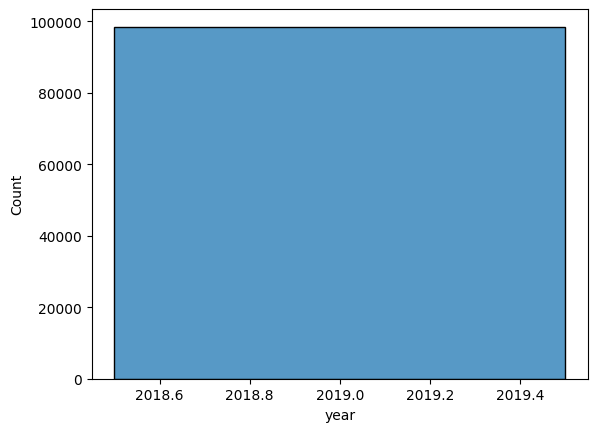

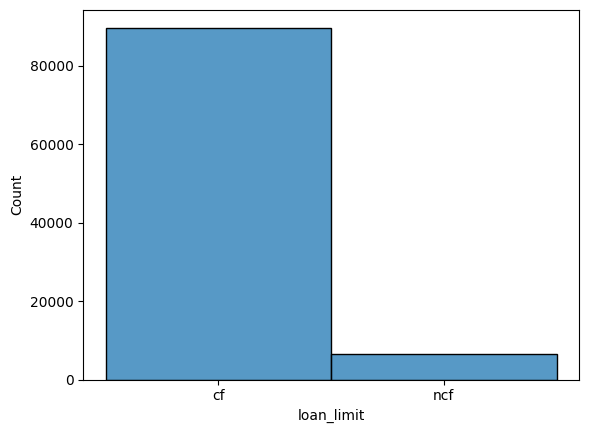

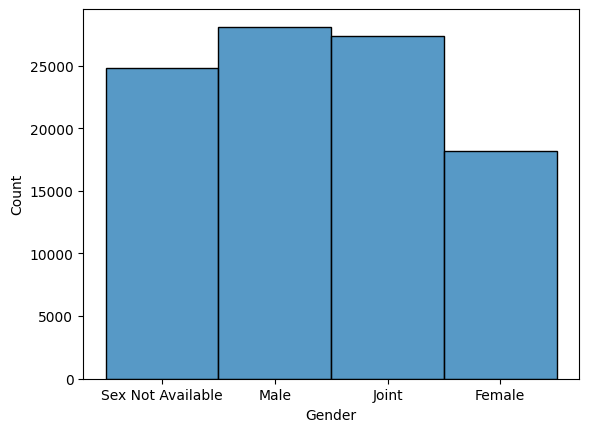

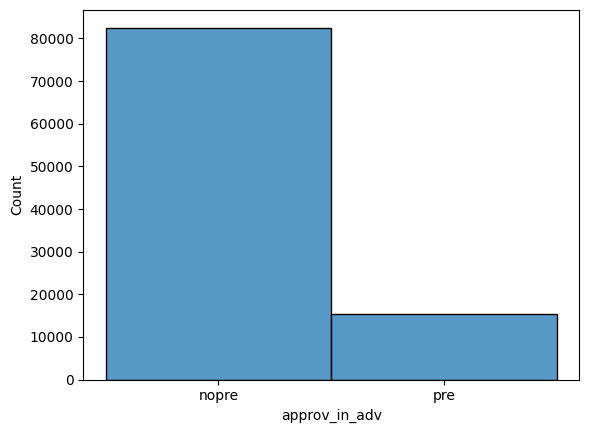

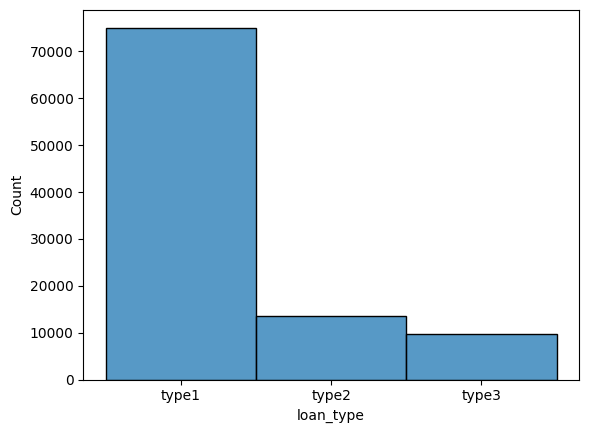

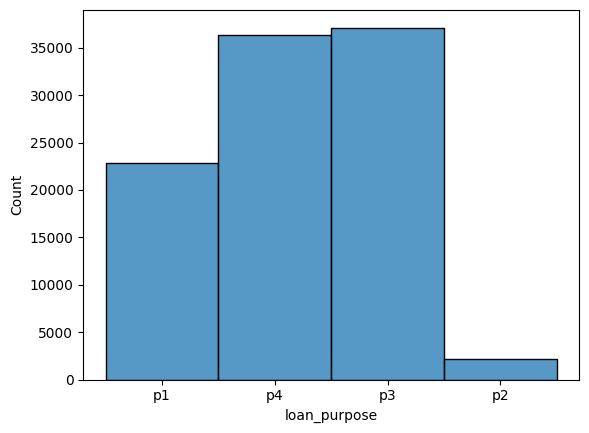

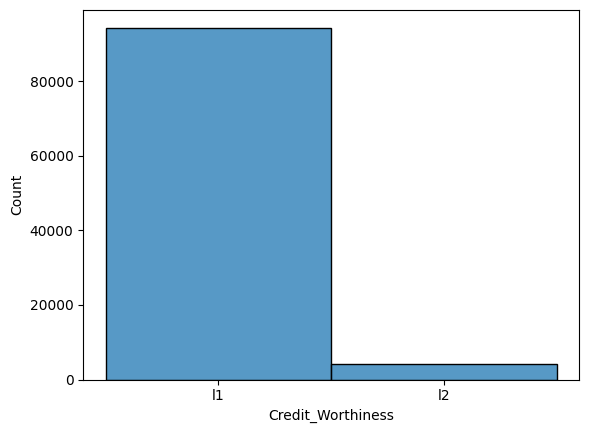

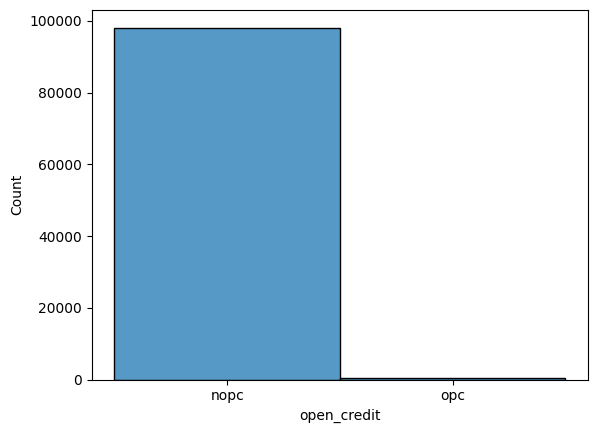

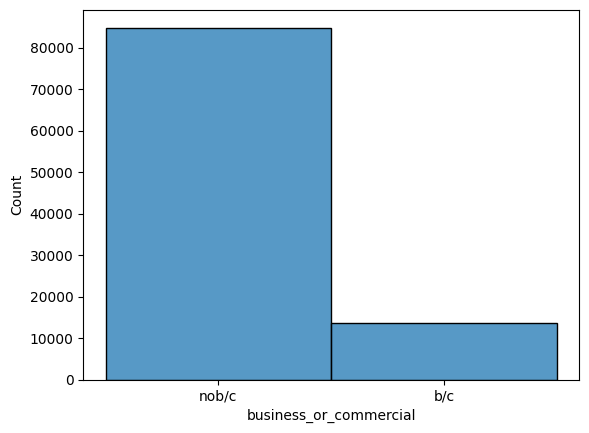

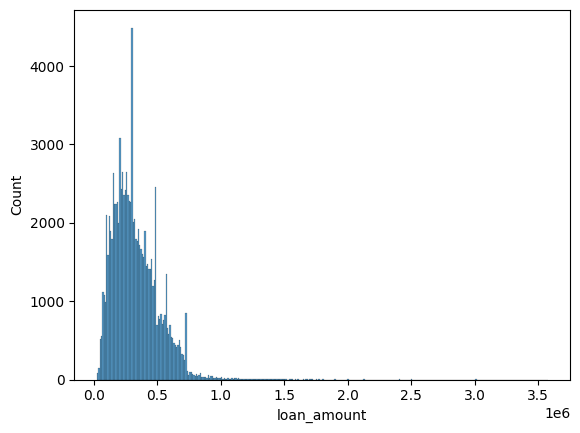

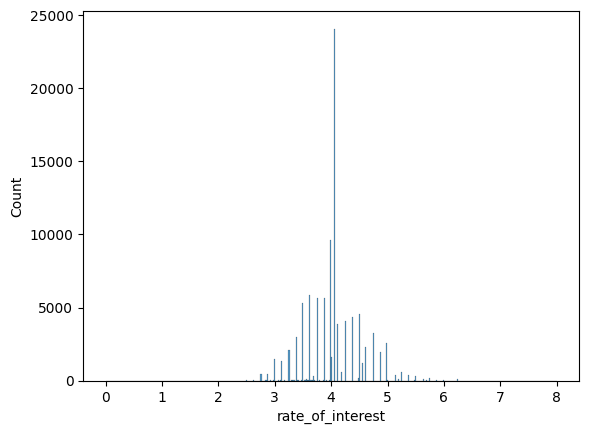

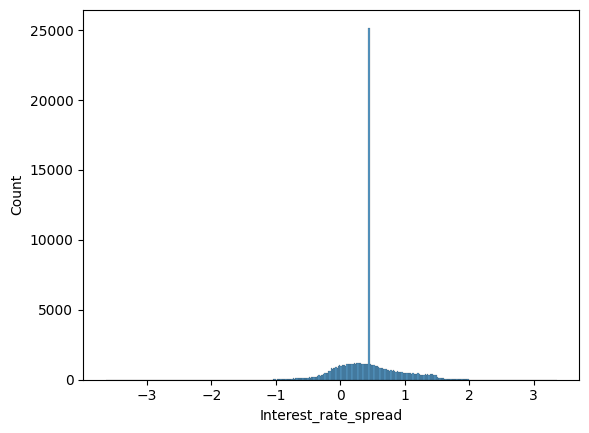

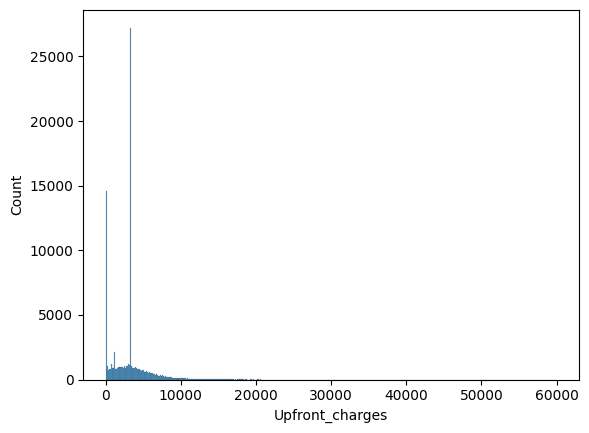

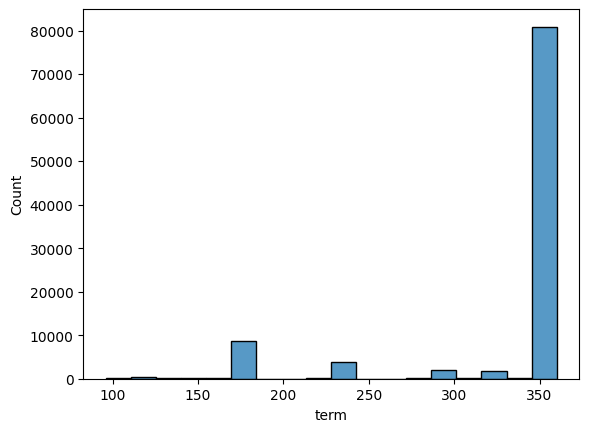

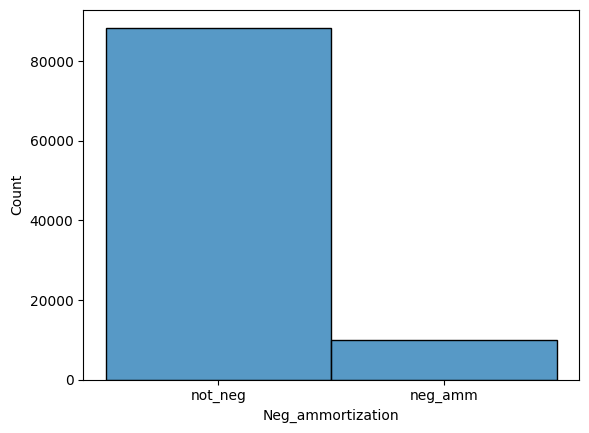

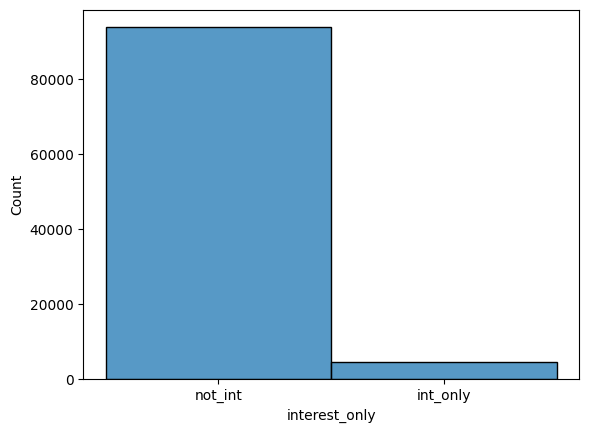

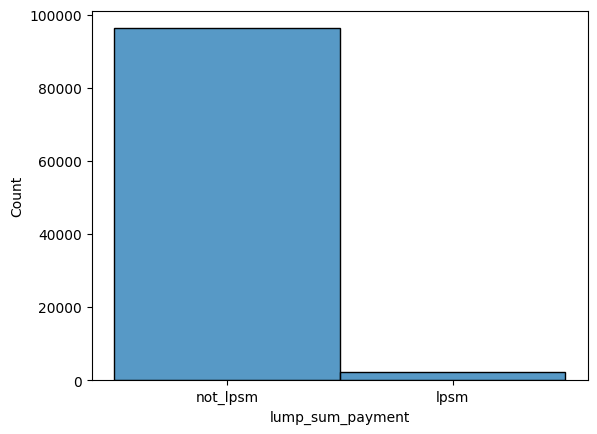

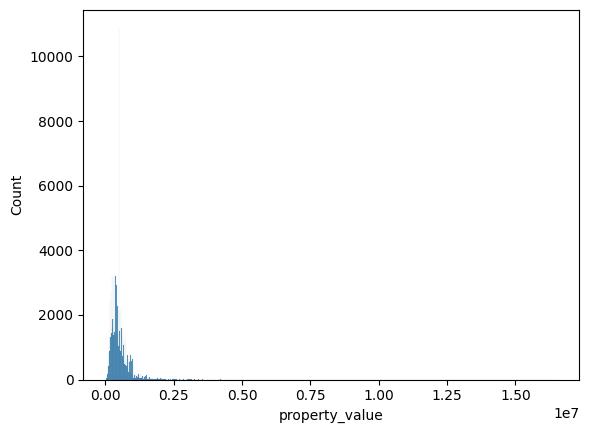

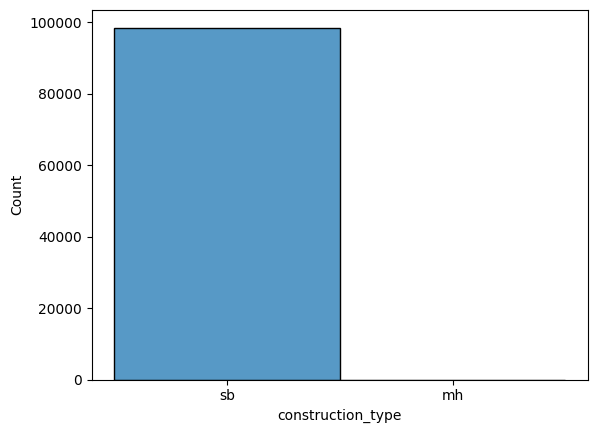

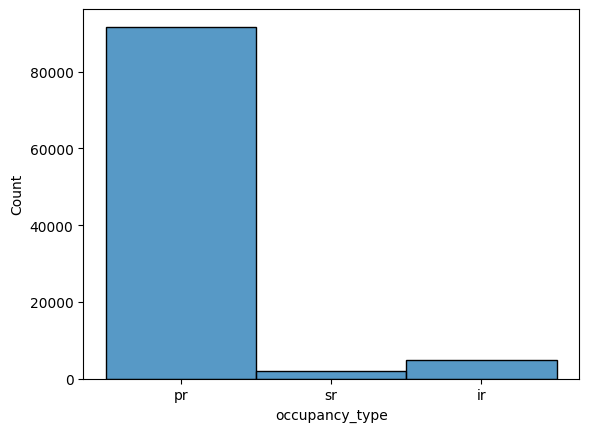

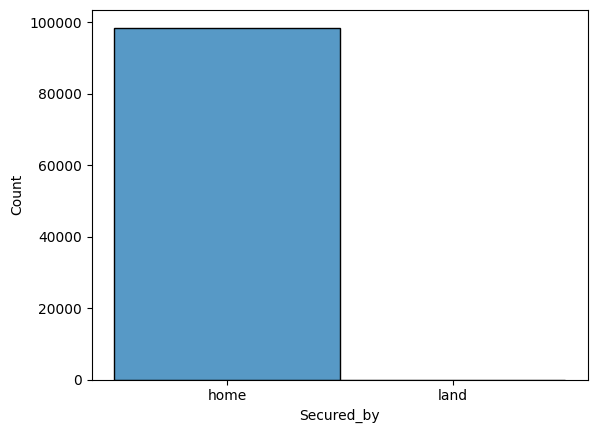

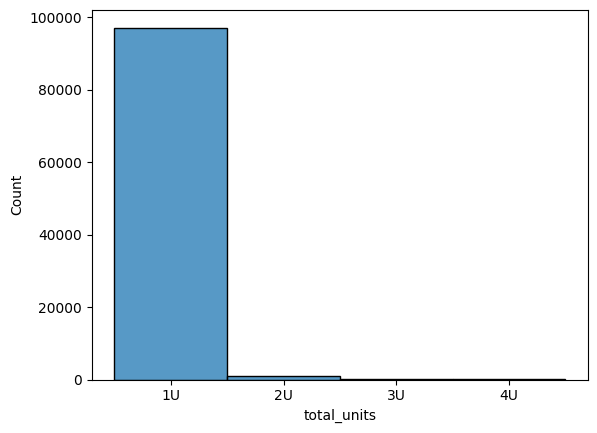

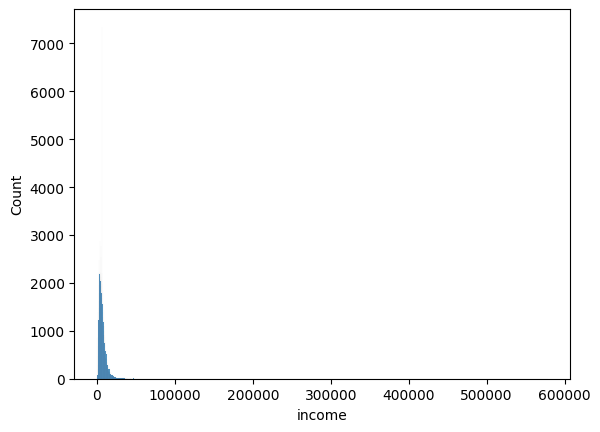

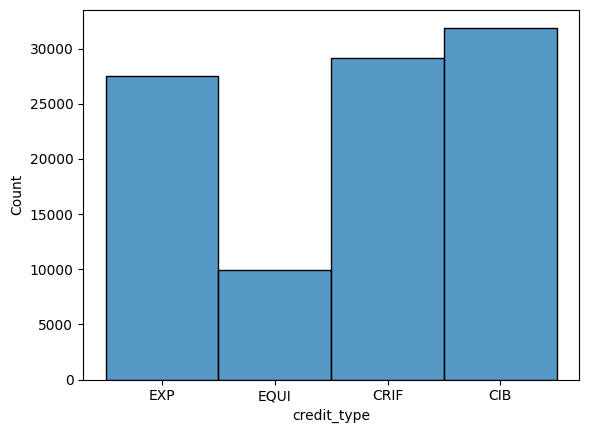

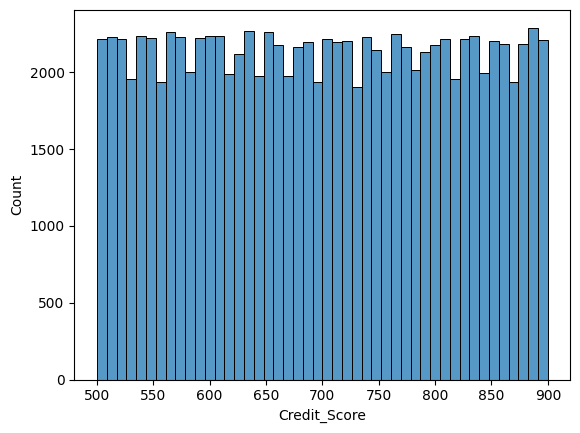

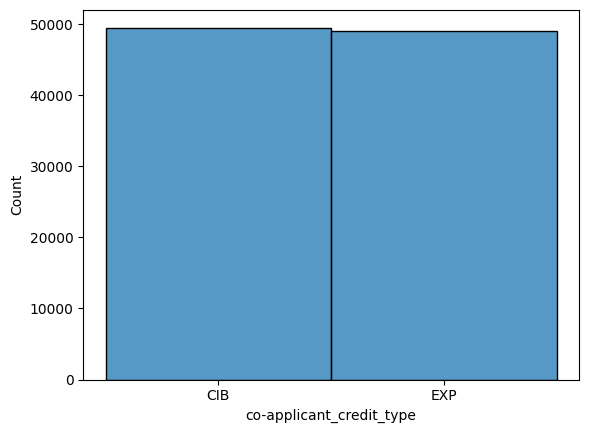

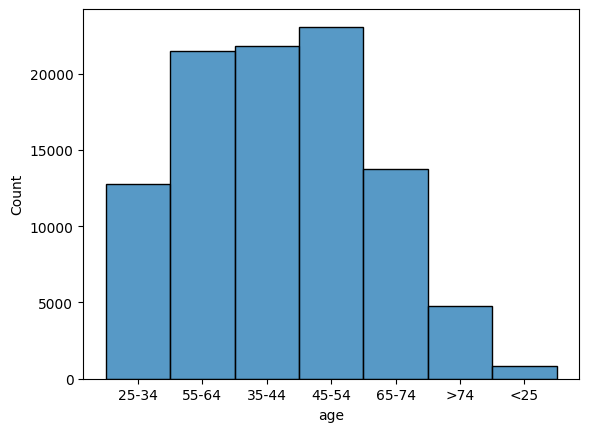

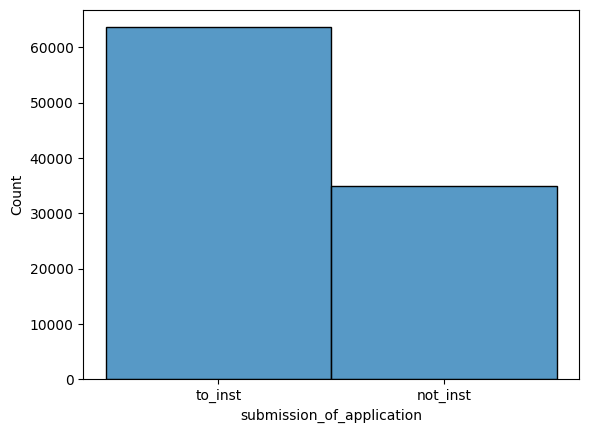

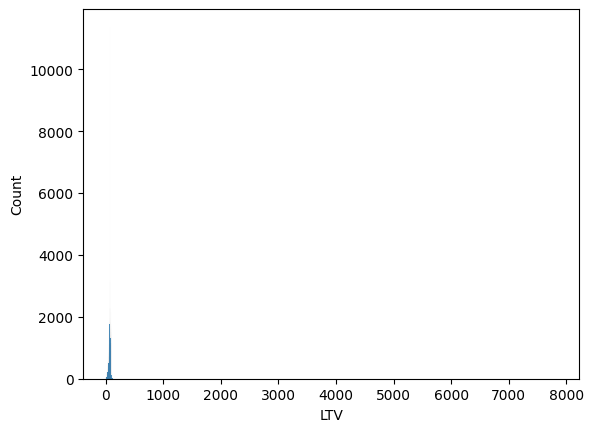

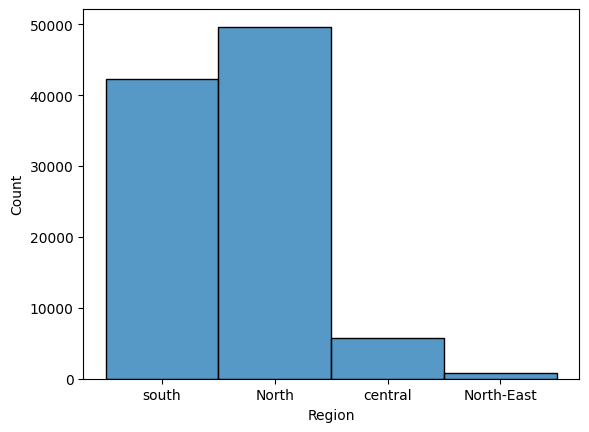

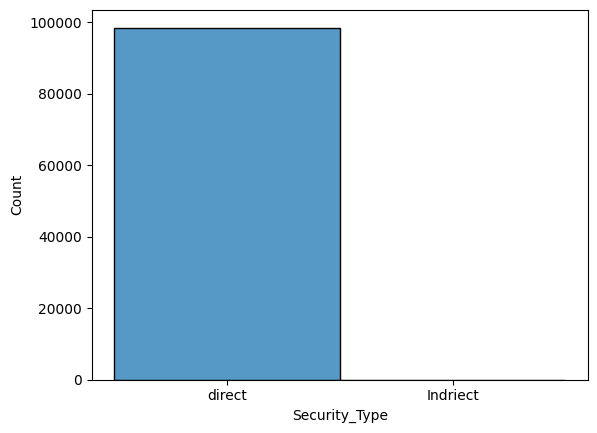

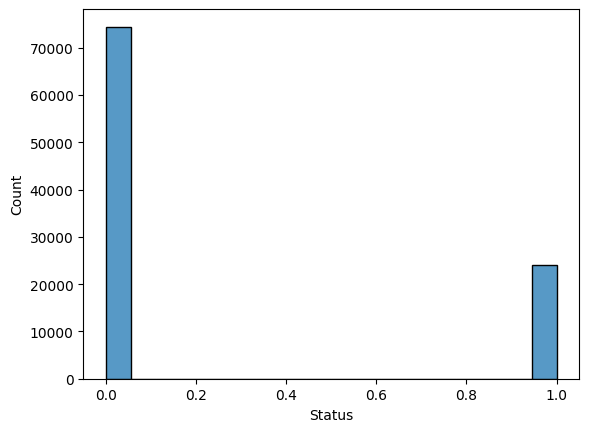

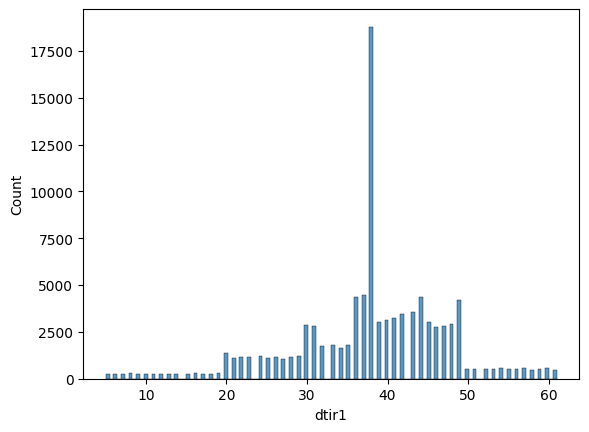

In [ ]:
for col in df.columns:
    sns.histplot(df[col])
    plt.show()

In [ ]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'business_or_commercial', 'loan_amount',
       'rate_of_interest', 'Interest_rate_spread', 'term', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Status', 'dtir1'],
      dtype='object')

In [ ]:
df.drop('Credit_Worthiness',axis=1,inplace=True)

In [ ]:
df.drop('open_credit',axis=1,inplace=True)

In [ ]:
df.drop('Upfront_charges',axis=1,inplace=True)

In [ ]:
df.drop('Neg_ammortization',axis=1,inplace=True)

In [ ]:
df.drop('interest_only',axis=1,inplace=True)

In [ ]:
df.drop('lump_sum_payment',axis=1,inplace=True)

In [ ]:
df.drop('income',axis=1,inplace=True)

In [ ]:
df.drop('LTV',axis=1,inplace=True)

In [ ]:
df.drop('property_value',axis=1,inplace=True)

In [ ]:
df.drop('construction_type',axis=1,inplace=True)

In [ ]:
df.drop('occupancy_type',axis=1,inplace=True)

In [ ]:
df.drop('total_units',axis=1,inplace=True)

In [ ]:
df.drop('Security_Type',axis=1, inplace=True)

In [ ]:
df.drop('Secured_by',axis=1,inplace=True)

In [ ]:


le = LabelEncoder()
for column in df.columns:
  if df[column].dtype == 'object':
    df[column] = le.fit_transform(df[column])


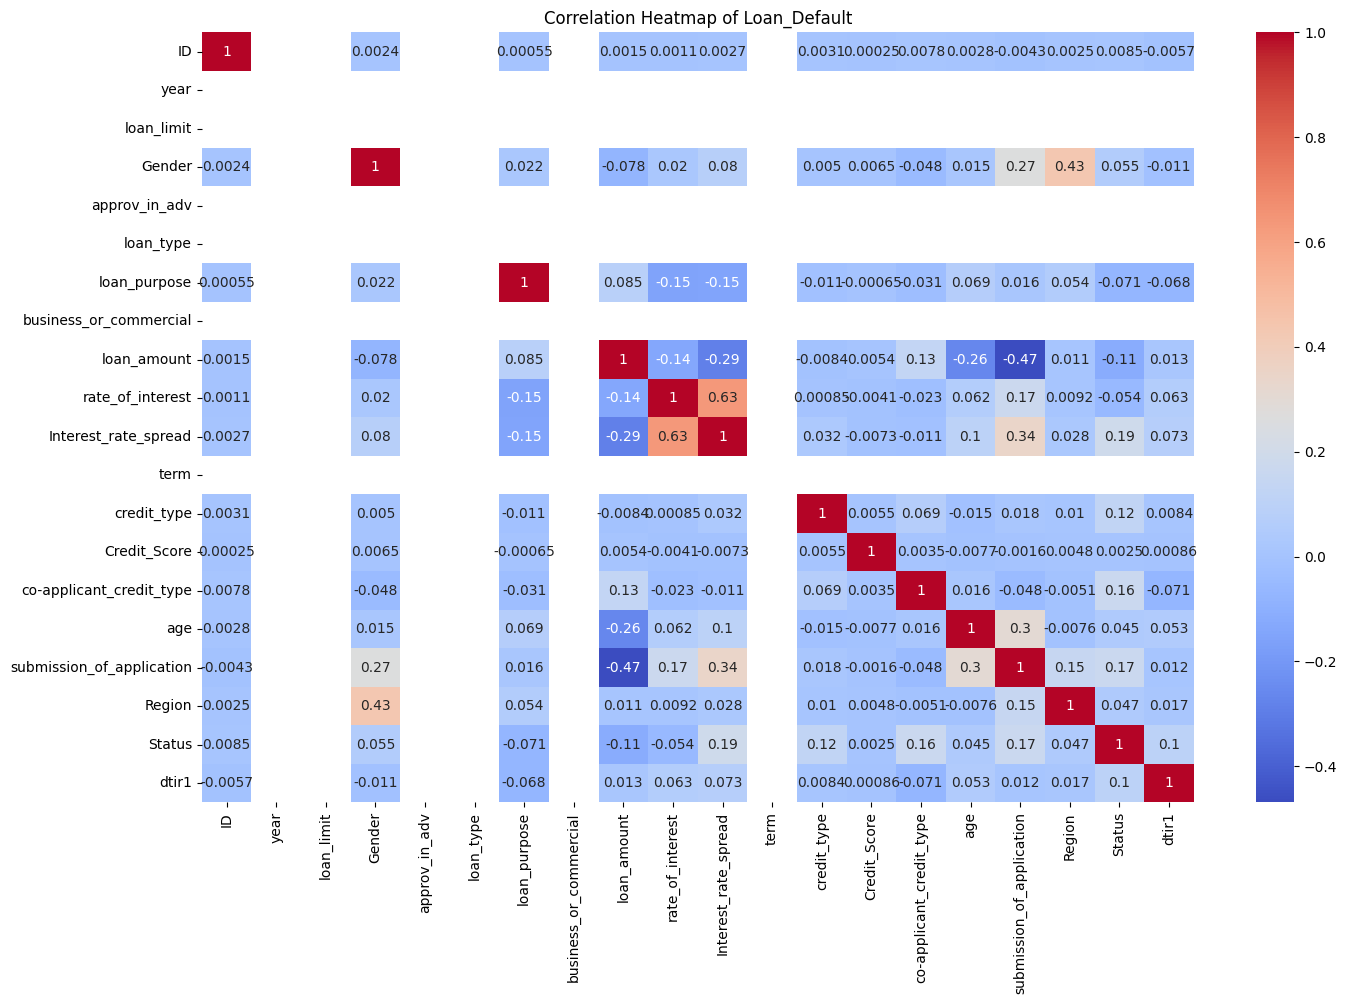

In [ ]:
# Select only numerical columns for the heatmap
numerical_cols = df.select_dtypes(include=['number'])

# Create a correlation matrix
correlation_matrix = numerical_cols.corr()

# Create a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Loan_Default')
plt.show()

### check for outlayers

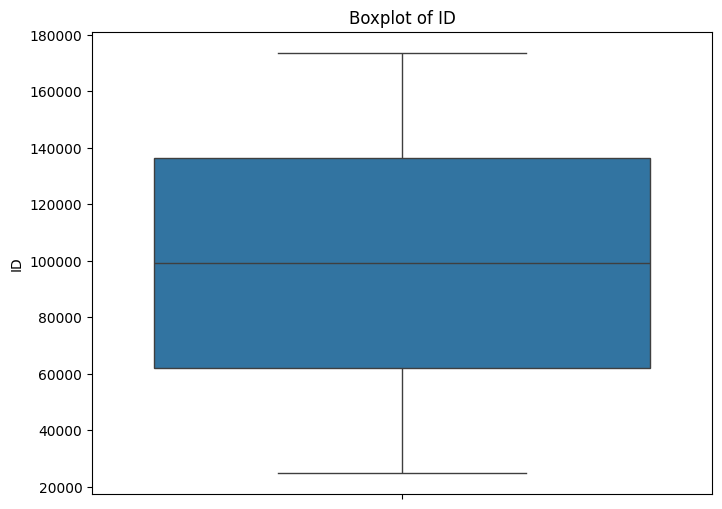

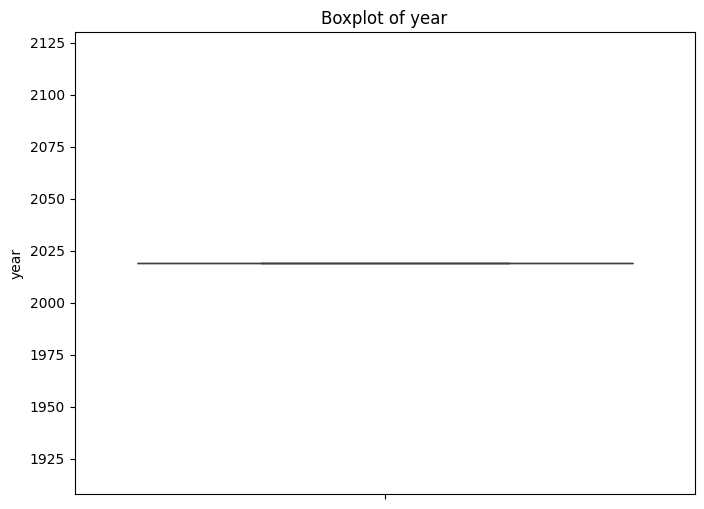

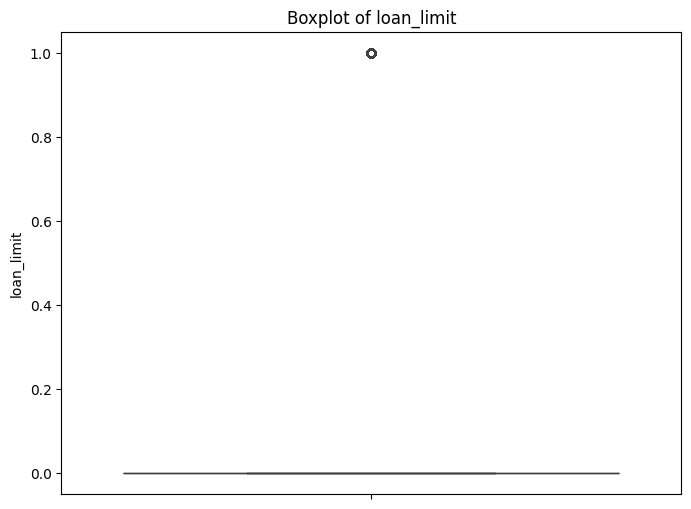

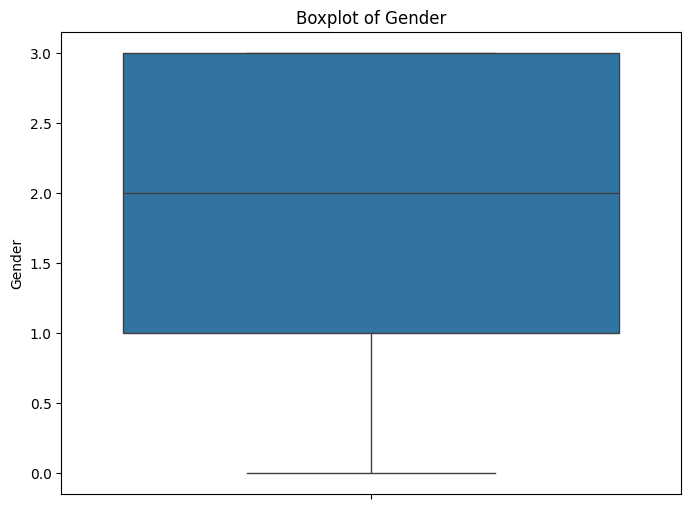

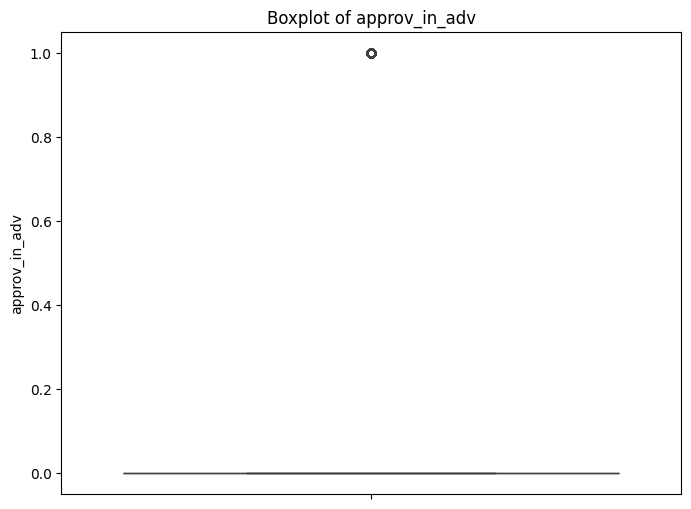

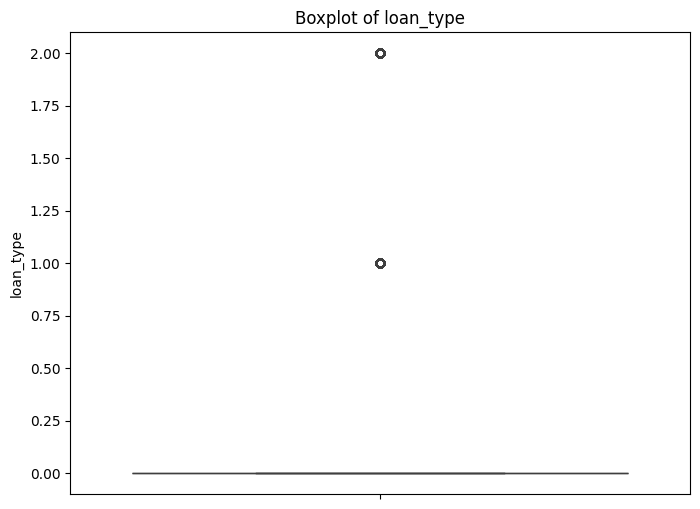

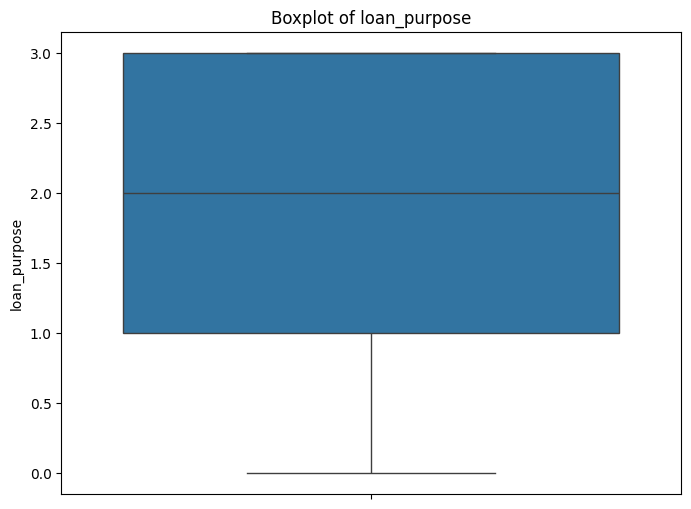

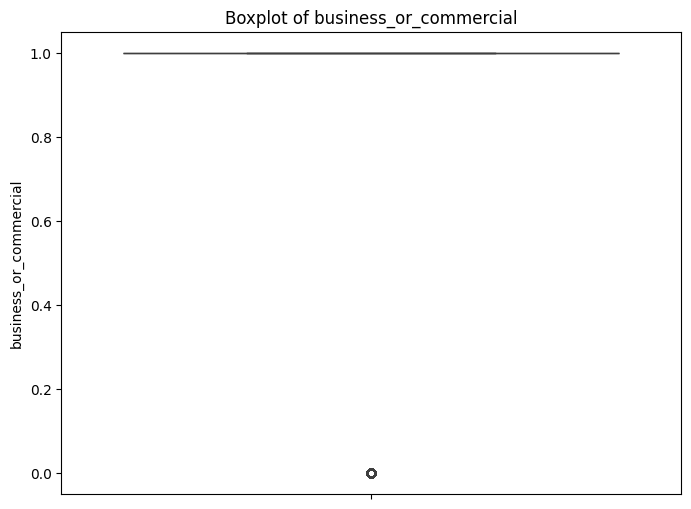

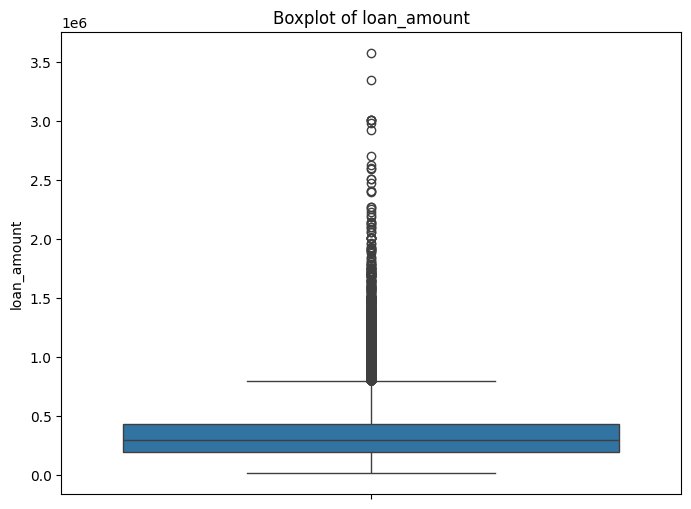

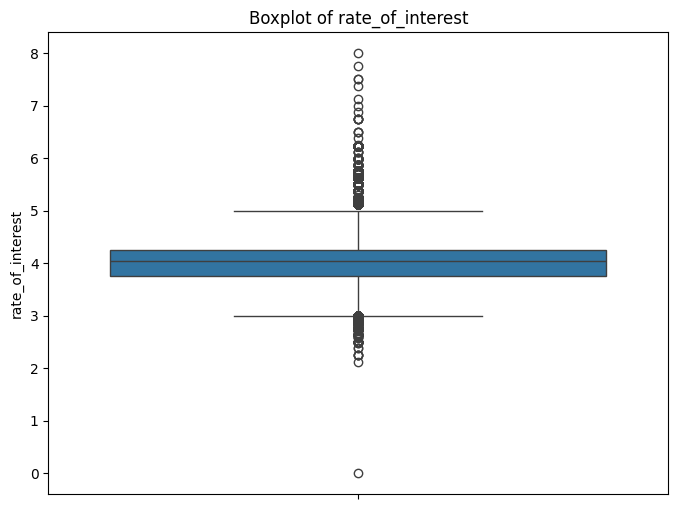

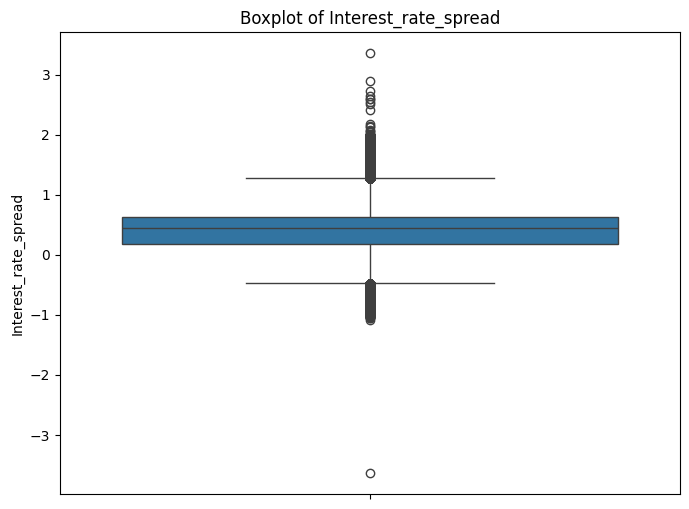

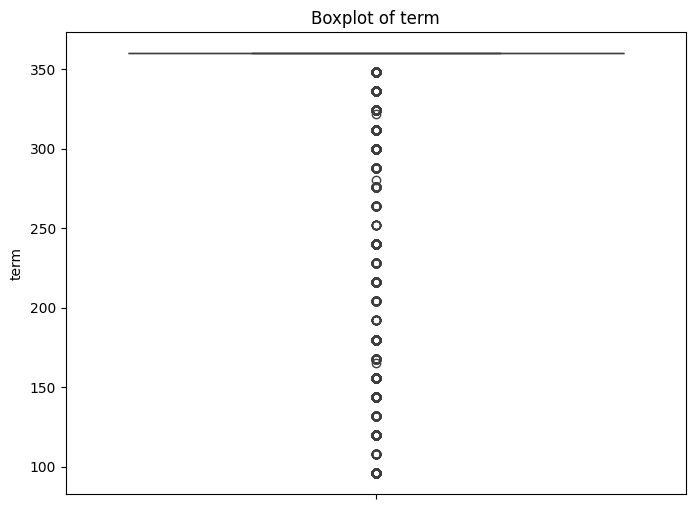

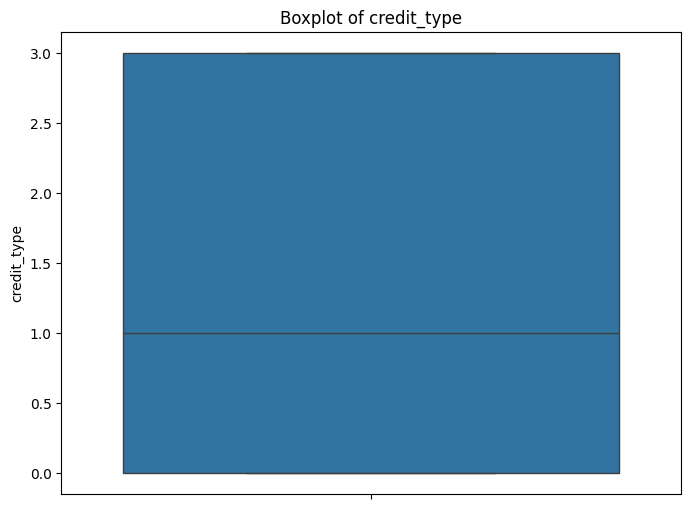

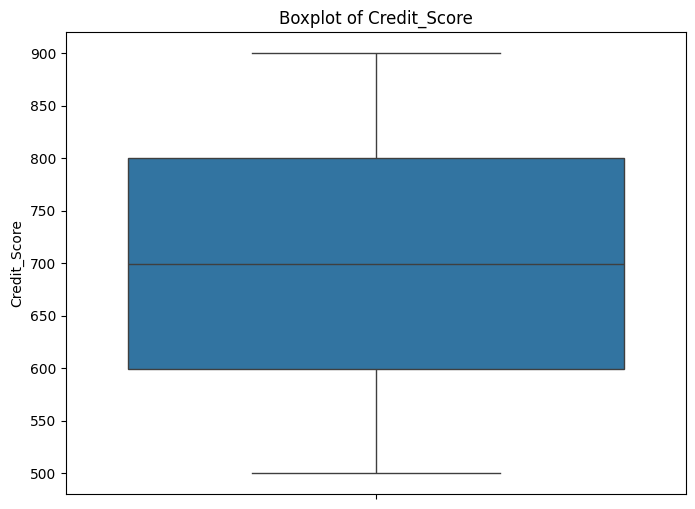

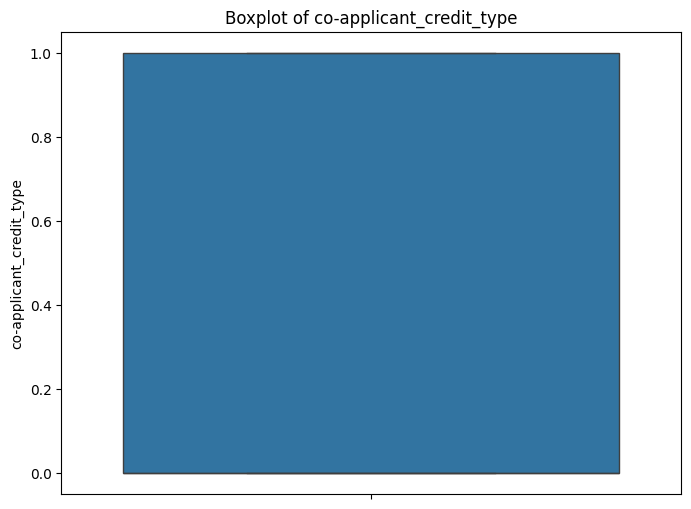

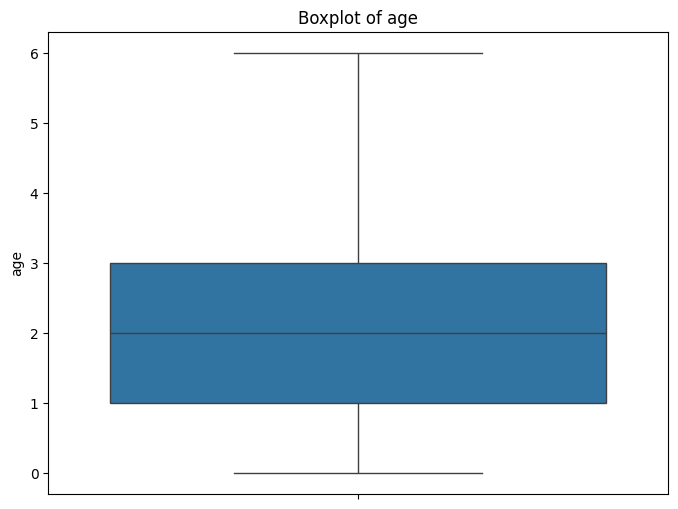

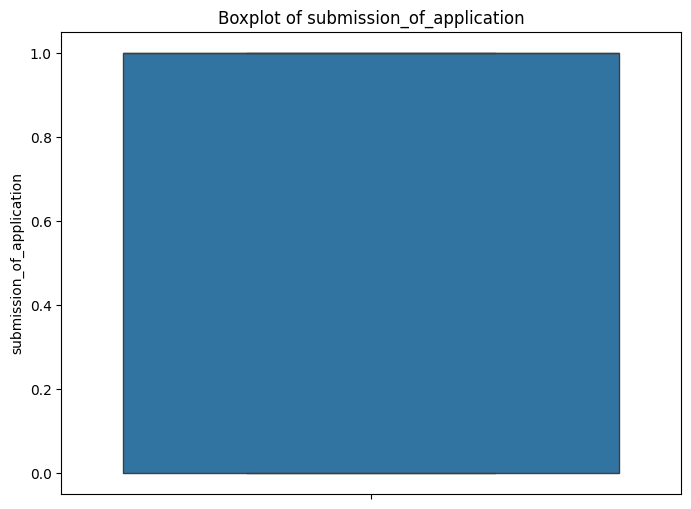

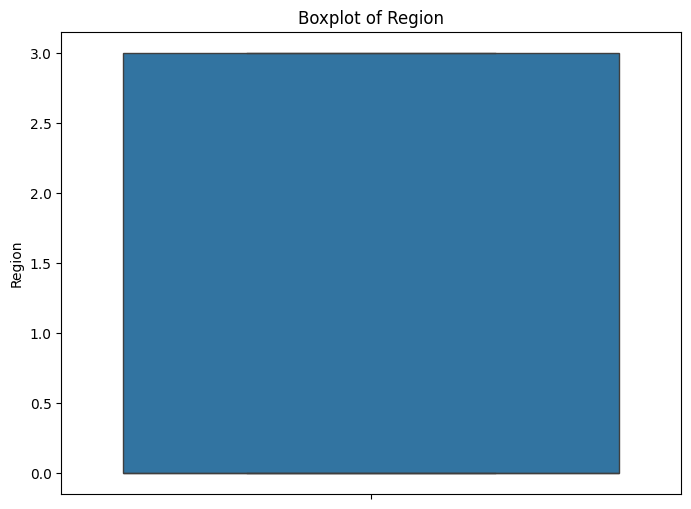

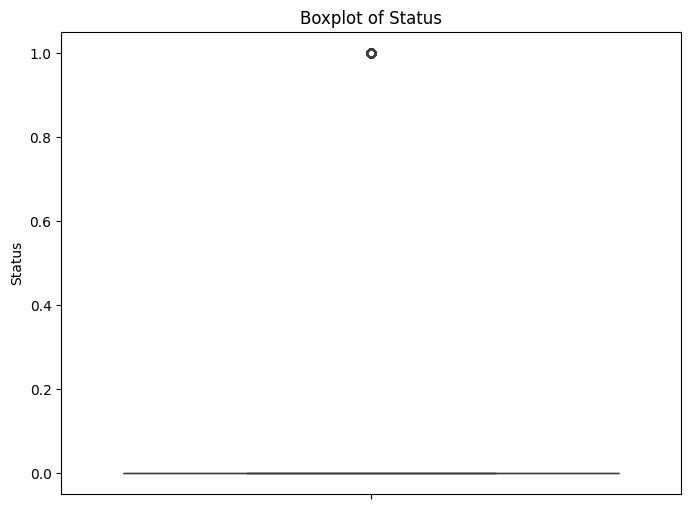

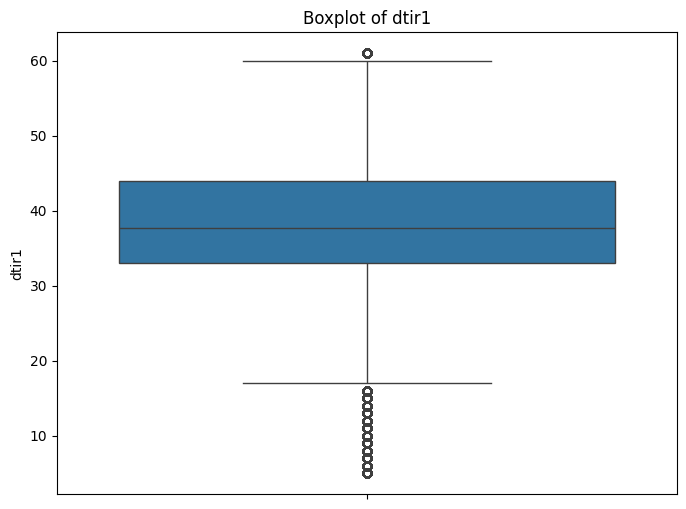

In [ ]:
for col in df.columns:
  plt.figure(figsize=(8,6))
  sns.boxplot(df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [ ]:

df1 = df.drop(["Status"], axis=1)
numeric_df = df1.select_dtypes(include=[np.number])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1


outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))


df = df[~outliers.any(axis=1)]


print("Number of outliers removed for each feature:")
print(outliers.sum())

Number of outliers removed for each feature:
ID                               0
year                             0
loan_limit                   13091
Gender                           0
approv_in_adv                23067
loan_type                    35076
loan_purpose                     0
business_or_commercial       20448
loan_amount                   1872
rate_of_interest              6743
Interest_rate_spread         11290
term                         26639
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                              0
submission_of_application        0
Region                           0
dtir1                         5460
dtype: int64


## *testing*

### split data

In [ ]:
X = df.drop('Status', axis=1)
y = df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### using random forest before grid search

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 100.00%


### grid search

In [ ]:
#i donot think i need grid search i have 100% accuracy
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

### random forest after grid search

In [ ]:
rf=RandomForestClassifier(**grid_search.best_params_)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

### use descion tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0
